# Hamilton vs. Bottas DutchGP 2021

In [2]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.collections import LineCollection
%matplotlib inline

In [3]:
# Enable the cache
ff1.Cache.enable_cache('./cache')

In [4]:
# Load the session data
year, grand_prix, session = 2021, 'Zandvoort', 'R' # could range from “FP1” to “Q” and “R”

In [5]:
race_zandvoort=ff1.get_session(year, grand_prix, session)
race_zandvoort.load()

core           INFO 	Loading data for Dutch Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['33', '44', '77', '10', '16', '14', '55', '11', '31', '4', '3', '18', '5', '99', '88', '6', '63', '47', '22', '9']


In [6]:
race_zandvoort.event

RoundNumber                                                13
Country                                           Netherlands
Location                                            Zandvoort
OfficialEventName    FORMULA 1 HEINEKEN DUTCH GRAND PRIX 2021
EventDate                                 2021-09-05 00:00:00
EventName                                    Dutch Grand Prix
EventFormat                                      conventional
Session1                                           Practice 1
Session1Date                              2021-09-03 00:00:00
Session2                                           Practice 2
Session2Date                              2021-09-03 00:00:00
Session3                                           Practice 3
Session3Date                              2021-09-04 00:00:00
Session4                                           Qualifying
Session4Date                              2021-09-04 00:00:00
Session5                                                 Race
Session5

In [7]:
ham = race_zandvoort.laps.pick_driver('HAM')
bot = race_zandvoort.laps.pick_driver('BOT')

In [8]:
ham.info()

<class 'fastf1.core.Laps'>
Int64Index: 72 entries, 72 to 143
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                72 non-null     timedelta64[ns]
 1   DriverNumber        72 non-null     object         
 2   LapTime             71 non-null     timedelta64[ns]
 3   LapNumber           72 non-null     int64          
 4   PitOutTime          4 non-null      timedelta64[ns]
 5   PitInTime           3 non-null      timedelta64[ns]
 6   Sector1Time         71 non-null     timedelta64[ns]
 7   Sector2Time         72 non-null     timedelta64[ns]
 8   Sector3Time         72 non-null     timedelta64[ns]
 9   Sector1SessionTime  71 non-null     timedelta64[ns]
 10  Sector2SessionTime  72 non-null     timedelta64[ns]
 11  Sector3SessionTime  72 non-null     timedelta64[ns]
 12  SpeedI1             57 non-null     float64        
 13  SpeedI2             72 non-null     float64   

In [9]:
bot.info()

<class 'fastf1.core.Laps'>
Int64Index: 72 entries, 144 to 215
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                72 non-null     timedelta64[ns]
 1   DriverNumber        72 non-null     object         
 2   LapTime             71 non-null     timedelta64[ns]
 3   LapNumber           72 non-null     int64          
 4   PitOutTime          3 non-null      timedelta64[ns]
 5   PitInTime           2 non-null      timedelta64[ns]
 6   Sector1Time         71 non-null     timedelta64[ns]
 7   Sector2Time         72 non-null     timedelta64[ns]
 8   Sector3Time         72 non-null     timedelta64[ns]
 9   Sector1SessionTime  71 non-null     timedelta64[ns]
 10  Sector2SessionTime  72 non-null     timedelta64[ns]
 11  Sector3SessionTime  72 non-null     timedelta64[ns]
 12  SpeedI1             61 non-null     float64        
 13  SpeedI2             72 non-null     float64  

In [10]:
ff1.plotting.setup_mpl(mpl_timedelta_support=True)

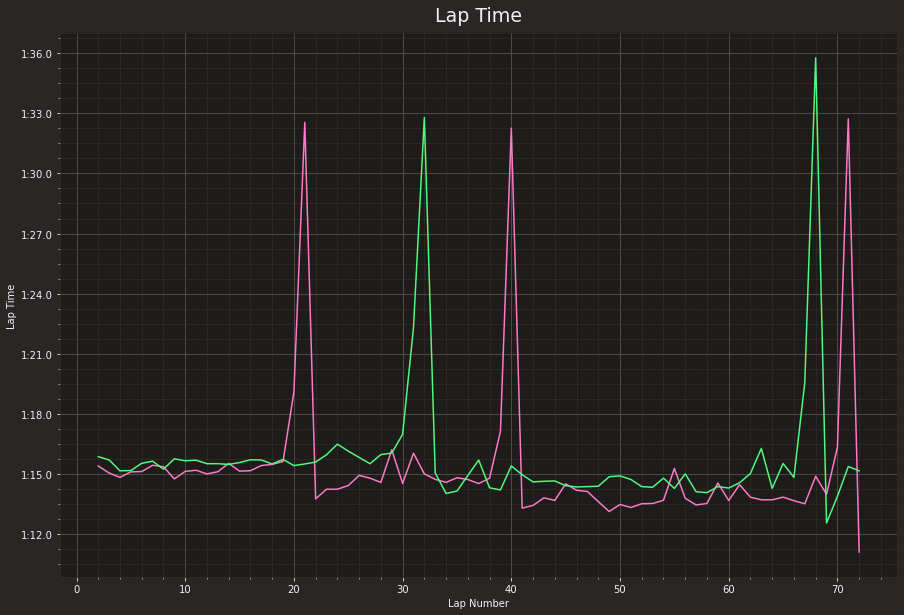

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(ham['LapNumber'], ham['LapTime'], label='BOT')
ax.plot(bot['LapNumber'], bot['LapTime'], label='HAM')

ax.set_title("Lap Time")
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

plt.show()

In [12]:
# Get telemetry from fastest laps
telemetry_bot = bot.pick_fastest().get_car_data().add_distance()
telemetry_ham = ham.pick_fastest().get_car_data().add_distance()

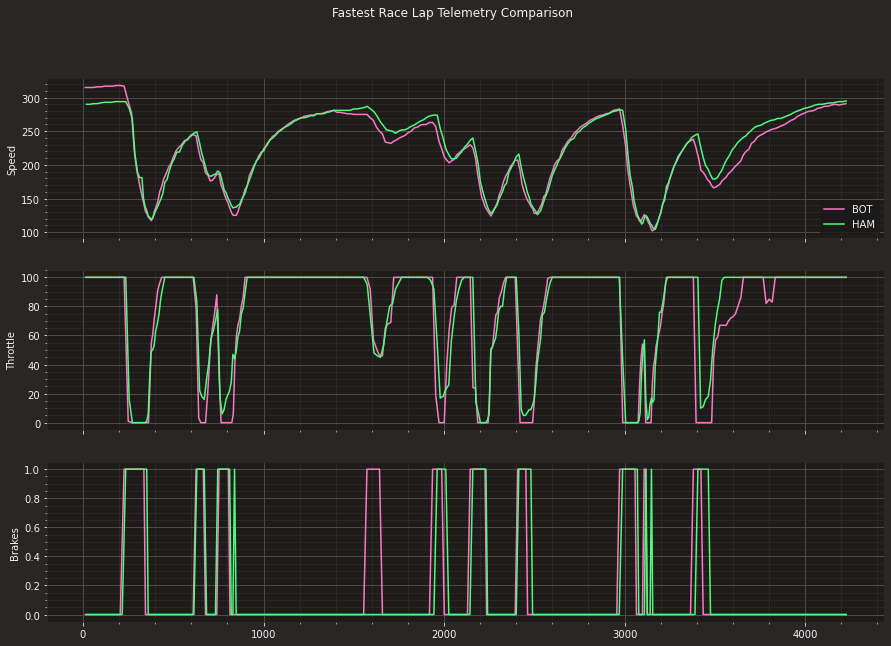

In [13]:
# Setup plotting
plotting.setup_mpl()

fig, ax = plt.subplots(3, figsize=(15, 10))
fig.suptitle("Fastest Race Lap Telemetry Comparison")

ax[0].plot(telemetry_bot['Distance'], telemetry_bot['Speed'], label='BOT')
ax[0].plot(telemetry_ham['Distance'], telemetry_ham['Speed'], label='HAM')
ax[0].set(ylabel='Speed')
ax[0].legend(loc="lower right")

ax[1].plot(telemetry_bot['Distance'], telemetry_bot['Throttle'], label='BOT')
ax[1].plot(telemetry_ham['Distance'], telemetry_ham['Throttle'], label='HAM')
ax[1].set(ylabel='Throttle')

ax[2].plot(telemetry_bot['Distance'], telemetry_bot['Brake'], label='BOT')
ax[2].plot(telemetry_ham['Distance'], telemetry_ham['Brake'], label='HAM')
ax[2].set(ylabel='Brakes')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()

plt.show()

At the end of the race, Bottas was on his way to set the fastest lap, despite being told that they were not going for the fastest lap. During his attempt, Bottas was asked by James Vowles to abort his lap to make sure that Hamilton would get the extra point.

In [22]:
colormap = mpl.cm.plasma

In [15]:
lap = ham.pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on

In [16]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

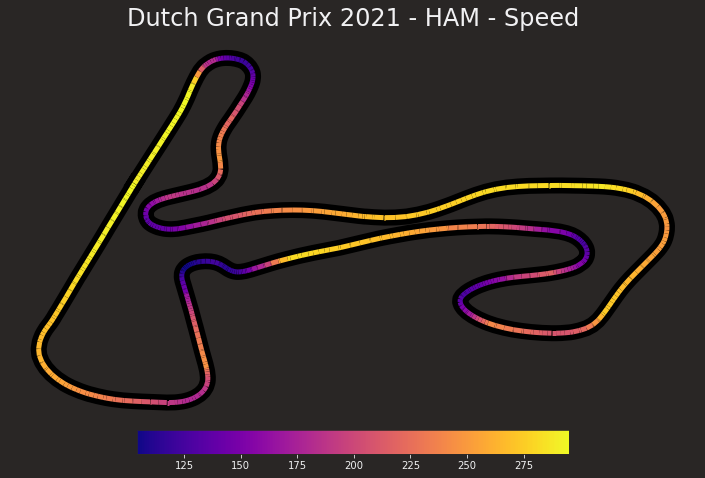

In [17]:
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle("Dutch Grand Prix 2021 - HAM - Speed", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")


# Show the plot
plt.show()

In [18]:
lap = bot.pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on

In [19]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

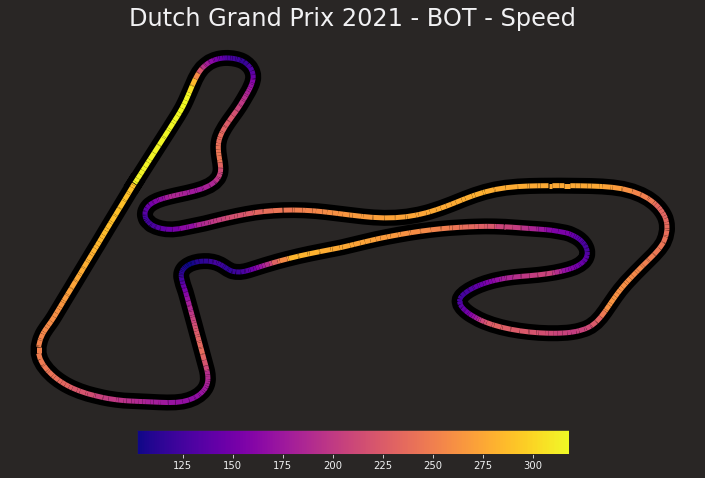

In [21]:
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle("Dutch Grand Prix 2021 - BOT - Speed", size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")


# Show the plot
plt.show()